In [2]:
from src.__entro_plot__ import *
from src.__models__ import *
import tenpy

%matplotlib inline
current_dir = os.getcwd() 

C:\Users\maxgr\anaconda3\lib\site-packages\tenpy\tools\optimization.py:307: UserWarning: Couldn't load compiled cython code. Code will run a bit slower.
  warnings.warn("Couldn't load compiled cython code. Code will run a bit slower.")


# Random matrices

### Create a random matrix from GOE

In [3]:
A = tenpy.linalg.random_matrix.GOE((1000, 1000)) + 1j * tenpy.linalg.random_matrix.GOE((1000, 1000))
print(A-A.conj().T)

[[0.-0.62579936j 0.+0.75209264j 0.-0.2409202j  ... 0.-1.14450266j
  0.+0.23745426j 0.-0.27694823j]
 [0.+0.75209264j 0.-0.3035093j  0.+0.11044385j ... 0.-0.86149837j
  0.-1.27035674j 0.-1.06917017j]
 [0.-0.2409202j  0.+0.11044385j 0.+0.64202264j ... 0.+0.27955472j
  0.-1.17410702j 0.+3.06318815j]
 ...
 [0.-1.14450266j 0.-0.86149837j 0.+0.27955472j ... 0.+5.25761865j
  0.-2.43014962j 0.+0.97783191j]
 [0.+0.23745426j 0.-1.27035674j 0.-1.17410702j ... 0.-2.43014962j
  0.-1.76623969j 0.-1.44455729j]
 [0.-0.27694823j 0.-1.06917017j 0.+3.06318815j ... 0.+0.97783191j
  0.-1.44455729j 0.+0.66978117j]]


### Create a random matrix from normals

In [4]:
size = int(2e3)
A = np.random.normal(0.0, 1.0, (size,size)) + 1j * np.random.normal(0.0, 1.0, (size, size))

Symmetrize

In [5]:
B = A-A.conj().T
val, vec = np.linalg.eigh(B)
val

array([-177.5330128 , -177.11124324, -176.45507118, ...,  175.62794025,
        175.92162864,  176.57917558])

### Print histogram

In [6]:
def sum_of_folded_normals(bins, sig1, sig2):
    sqrt_var = np.sqrt(sig1*sig1 + sig2*sig2)
    val = np.sqrt(2.0/np.pi)/sqrt_var
    val *= np.exp(-np.square(bins)/(2.0*sqrt_var*sqrt_var))
    val *= (erf(sig1 * bins/np.sqrt(2.0) / sig2 / sqrt_var) + erf(sig2 * bins/np.sqrt(2.0) / sig1 / sqrt_var))
    return val

def sum_of_squares_normals(bins):
    return np.exp(-bins/2.0)/2.0

def sum_of_squares_normals_sqrt(bins):
    return bins * np.exp(-np.square(bins)/2.0)

In [7]:
vec = vec.flatten()

2.0000000000000013
 1.27272418e+00 1.5707963267948966 1.2732395447351628
0.5942953014318689


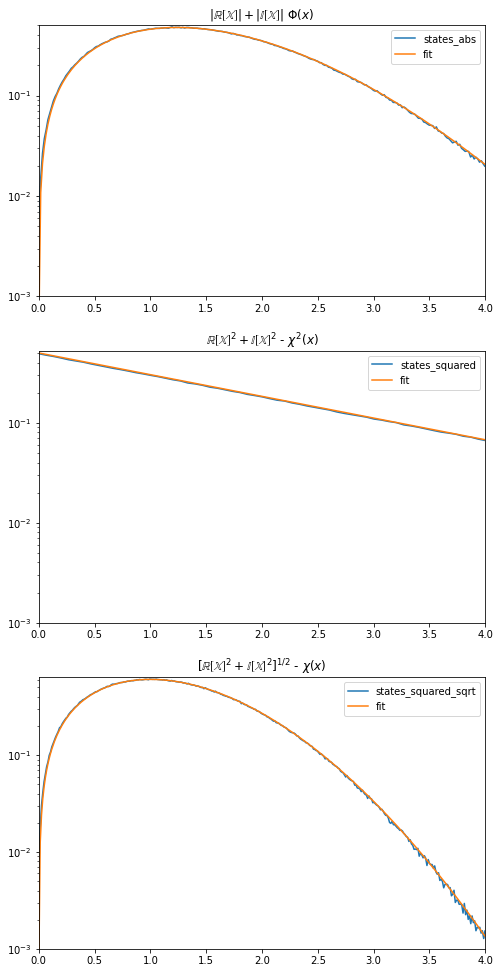

In [9]:
rescale_vec = lambda x : (x - np.mean(x))/np.sqrt(np.var(x))

states_r = rescale_vec(vec.real)
states_i = rescale_vec(vec.imag)
#states_r = abs(states_r.flatten())
#states_i = abs(states_i.flatten())
print(np.mean(np.var(states_i) + np.var(states_r)))

sum_abs = np.abs(states_i) + np.abs(states_r)
sum_square = np.square(states_i) + np.square(states_r)
sum_square_sqrt = np.sqrt(sum_square)

fig, ax = plt.subplots(3, figsize = (8,17))

print(f'{(gaussianity(sum_square_sqrt)) : .8e}', np.pi / 2, 4/np.pi)
print(gap_ratio(val, 0.8, False))

hist1, bins1 = np.histogram(sum_abs, 500, density=True)
hist2, bins2 = np.histogram(sum_square, 500, density=True)
hist3, bins3 = np.histogram(sum_square_sqrt, 500, density=True)


ax[0].plot(bins1[:-1], hist1, label = 'states_abs')
ax[1].plot(bins2[:-1], hist2, label = 'states_squared')
ax[2].plot(bins3[:-1], hist3, label = 'states_squared_sqrt')

#plt.plot(bins, np.array(bins) * np.exp(-np.square(bins)/2))

sum_fold_pred = sum_of_folded_normals(bins1, 1, 1)
sum_square_pred = sum_of_squares_normals(bins2)
sum_square_sqrt_pred = sum_of_squares_normals_sqrt(bins3)


ax[0].plot(bins1, sum_fold_pred, label = 'fit')
ax[1].plot(bins2, sum_square_pred, label = 'fit')
ax[2].plot(bins3, sum_square_sqrt_pred, label = 'fit')

ax[0].set_xlim(0,4)
ax[1].set_xlim(0,4)
ax[2].set_xlim(0,4)

ax[0].set_ylim(1e-3,)
ax[1].set_ylim(1e-3,)
ax[2].set_ylim(1e-3,)
#plt.yscale('log')
ax[0].set_yscale('log')
ax[1].set_yscale('log')
ax[2].set_yscale('log')

ax[0].set_title('$|\mathbb{R[X]}| + |\mathbb{I[X]}|$ $\Phi(x)$')
ax[1].set_title('$\mathbb{R[X]}^2 + \mathbb{I[X]}^2$ - $\chi ^2 (x)$')
ax[2].set_title('$[ \mathbb{R[X]}^2 + \mathbb{I[X]}^2 ] ^{1/2}$ - $\chi (x)$')

ax[0].legend()
ax[1].legend()
ax[2].legend()

# Entanglement entropy calculation test

### Page value

In [8]:
L = 6
La = L/2 
f = 1/2
n = 1/2

print(their_result(100, their_limit_l))
print(page_thermodynamic(1/2, their_limit_l))

- La*(n*np.log(n) + (1-n)*np.log(1-n)) + (f+np.log(1-f))/2 , their_result(5, L)

68.71814446571456
68.81471805599453


(1.982867951399863, 1.380175890696147)

### Artificial density matrix

In [9]:
arr = np.array([1,2,3,4,5,6,7,8, 1,2,3,4,5,6,7,8])
arr.reshape((4,4))

array([[1, 2, 3, 4],
       [5, 6, 7, 8],
       [1, 2, 3, 4],
       [5, 6, 7, 8]])

In [17]:
arr = np.array([1, 2, 3, 4, 5, 6, 7, 8, 1, 2, 3, 4, 5, 6, 7, 8])
full_mat = np.outer(arr, arr.T)
print(full_mat)
full_mat=full_mat.reshape([4, 4, 4, 4]);
red_mat = np.trace(full_mat, 0, 3)
print(red_mat)

red_mat = reduced_density_matrix(arr, 2, 4)
print(red_mat)

print(arr.reshape(4, 4))

[[ 1  2  3  4  5  6  7  8  1  2  3  4  5  6  7  8]
 [ 2  4  6  8 10 12 14 16  2  4  6  8 10 12 14 16]
 [ 3  6  9 12 15 18 21 24  3  6  9 12 15 18 21 24]
 [ 4  8 12 16 20 24 28 32  4  8 12 16 20 24 28 32]
 [ 5 10 15 20 25 30 35 40  5 10 15 20 25 30 35 40]
 [ 6 12 18 24 30 36 42 48  6 12 18 24 30 36 42 48]
 [ 7 14 21 28 35 42 49 56  7 14 21 28 35 42 49 56]
 [ 8 16 24 32 40 48 56 64  8 16 24 32 40 48 56 64]
 [ 1  2  3  4  5  6  7  8  1  2  3  4  5  6  7  8]
 [ 2  4  6  8 10 12 14 16  2  4  6  8 10 12 14 16]
 [ 3  6  9 12 15 18 21 24  3  6  9 12 15 18 21 24]
 [ 4  8 12 16 20 24 28 32  4  8 12 16 20 24 28 32]
 [ 5 10 15 20 25 30 35 40  5 10 15 20 25 30 35 40]
 [ 6 12 18 24 30 36 42 48  6 12 18 24 30 36 42 48]
 [ 7 14 21 28 35 42 49 56  7 14 21 28 35 42 49 56]
 [ 8 16 24 32 40 48 56 64  8 16 24 32 40 48 56 64]]
[[ 30  70  30  70]
 [ 70 174  70 174]
 [ 30  70  30  70]
 [ 70 174  70 174]]
[[ 30.  70.  30.  70.]
 [ 70. 174.  70. 174.]
 [ 30.  70.  30.  70.]
 [ 70. 174.  70. 174.]]
[[1 2 3 4]
 [

### Test the maximally entangled state

In [10]:
# 0 a 0 b -> 0 0
# 1 a 0 b -> 1 0
# 0 a 1 b -> 0 1
# 1 a 1 b -> 1 1


arr = 1/np.sqrt(2) * np.array([0, 1, -1, 0])
np.square(arr).sum()

0.9999999999999998

#### Create a density matrix out of it

In [12]:
full_mat = np.outer(arr, arr)
print(full_mat)
print(np.trace(full_mat))
print(np.trace(full_mat * full_mat))

[[ 0.   0.  -0.   0. ]
 [ 0.   0.5 -0.5  0. ]
 [-0.  -0.5  0.5 -0. ]
 [ 0.   0.  -0.   0. ]]
0.9999999999999998
0.4999999999999998


In [13]:
red_dens = reduced_density_matrix(arr, 1, 2)
print(red_dens)
print(np.trace(red_dens * red_dens))

[[0.5 0. ]
 [0.  0.5]]
0.4999999999999998


In [14]:
eig_sym = np.linalg.eigvals(red_dens)
ent = -np.multiply(eig_sym, np.log(eig_sym)).sum()
ent / np.log(2)

1.0000000000000002

In [16]:
full_mat_tens = full_mat.reshape((2, 2, 2, 2))
print(full_mat_tens)
red = np.trace(full_mat_tens, 0, 3)
print(red)
print(np.trace(red * red))

[[[[ 0.   0. ]
   [-0.   0. ]]

  [[ 0.   0.5]
   [-0.5  0. ]]]


 [[[-0.  -0.5]
   [ 0.5 -0. ]]

  [[ 0.   0. ]
   [-0.   0. ]]]]
[[0.5 0. ]
 [0.  0.5]]
0.4999999999999998


# Particle conservating Hamiltonian

### Read the log file for given set of parameters

In [2]:
N = 20
su=True
directory = current_dir + f"{kPSep}xyz_su_bc=0{kPSep}resultsXYZ{N}{kPSep}"

df = get_log_file(directory, read_log=False,su=su)
df = df[df['Jb'] <= 2.0][df['da'] < 1.2]
df

                                                  model  \
0     _xyz_sym,Ns=20,Ja=1.00,Jb=0.10,hx=0.00,hz=0.00...   
1     _xyz_sym,Ns=20,Ja=1.00,Jb=0.10,hx=0.00,hz=0.00...   
2     _xyz_sym,Ns=20,Ja=1.00,Jb=0.10,hx=0.00,hz=0.00...   
3     _xyz_sym,Ns=20,Ja=1.00,Jb=0.10,hx=0.00,hz=0.00...   
4     _xyz_sym,Ns=20,Ja=1.00,Jb=0.10,hx=0.00,hz=0.00...   
...                                                 ...   
6638  _xyz_sym,Ns=20,Ja=1.00,Jb=2.10,hx=0.00,hz=0.00...   
6639  _xyz_sym,Ns=20,Ja=1.00,Jb=2.10,hx=0.00,hz=0.00...   
6640  _xyz_sym,Ns=20,Ja=1.00,Jb=2.10,hx=0.00,hz=0.00...   
6641  _xyz_sym,Ns=20,Ja=1.00,Jb=2.10,hx=0.00,hz=0.00...   
6642  _xyz_sym,Ns=20,Ja=1.00,Jb=2.10,hx=0.00,hz=0.00...   

                                            model_short  
0     _xyz_sym,Ns=20,Ja=1.00,Jb=0.10,hx=0.00,hz=0.00...  
1     _xyz_sym,Ns=20,Ja=1.00,Jb=0.10,hx=0.00,hz=0.00...  
2     _xyz_sym,Ns=20,Ja=1.00,Jb=0.10,hx=0.00,hz=0.00...  
3     _xyz_sym,Ns=20,Ja=1.00,Jb=0.10,hx=0.00,hz=0.00...  
4

C:\Users\maxgr\AppData\Local\Temp\ipykernel_4368\1963182075.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df['Jb'] <= 2.0][df['da'] < 1.2]


,index,model,model_short,Ns,Ja,Jb,hx,hz,da,db,ea,eb,k,p,x,su,bc,spectrum_num,sec,Nh
0,0,"_xyz_sym,Ns=20,Ja=1.00,Jb=0.10,hx=0.00,hz=0.00...","_xyz_sym,Ns=20,Ja=1.00,Jb=0.10,hx=0.00,hz=0.00...",20.0,1.0,0.1,0.0,0.0,0.1,0.3,0.0,0.0,0.0,-1.0,-1.0,10.0,0.0,2364.0,real,2364
1,26,"_xyz_sym,Ns=20,Ja=1.00,Jb=0.10,hx=0.00,hz=0.00...","_xyz_sym,Ns=20,Ja=1.00,Jb=0.10,hx=0.00,hz=0.00...",20.0,1.0,0.1,0.0,0.0,0.2,0.3,0.0,0.0,0.0,-1.0,-1.0,10.0,0.0,2364.0,real,2364
2,52,"_xyz_sym,Ns=20,Ja=1.00,Jb=0.10,hx=0.00,hz=0.00...","_xyz_sym,Ns=20,Ja=1.00,Jb=0.10,hx=0.00,hz=0.00...",20.0,1.0,0.1,0.0,0.0,0.3,0.3,0.0,0.0,0.0,-1.0,-1.0,10.0,0.0,2364.0,real,2364
3,78,"_xyz_sym,Ns=20,Ja=1.00,Jb=0.10,hx=0.00,hz=0.00...","_xyz_sym,Ns=20,Ja=1.00,Jb=0.10,hx=0.00,hz=0.00...",20.0,1.0,0.1,0.0,0.0,0.4,0.3,0.0,0.0,0.0,-1.0,-1.0,10.0,0.0,2364.0,real,2364
4,104,"_xyz_sym,Ns=20,Ja=1.00,Jb=0.10,hx=0.00,hz=0.00...","_xyz_sym,Ns=20,Ja=1.00,Jb=0.10,hx=0.00,hz=0.00...",20.0,1.0,0.1,0.0,0.0,0.5,0.3,0.0,0.0,0.0,-1.0,-1.0,10.0,0.0,2364.0,real,2364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6633,6392,"_xyz_sym,Ns=20,Ja=1.00,Jb=2.00,hx=0.00,hz=0.00...","_xyz_sym,Ns=20,Ja=1.00,Jb=2.00,hx=0.00,hz=0.00...",20.0,1.0,2.0,0.0,0.0,0.7,0.3,0.0,0.0,10.0,1.0,1.0,10.0,0.0,2453.0,real,2453
6634,6418,"_xyz_sym,Ns=20,Ja=1.00,Jb=2.00,hx=0.00,hz=0.00...","_xyz_sym,Ns=20,Ja=1.00,Jb=2.00,hx=0.00,hz=0.00...",20.0,1.0,2.0,0.0,0.0,0.8,0.3,0.0,0.0,10.0,1.0,1.0,10.0,0.0,2453.0,real,2453
6635,6444,"_xyz_sym,Ns=20,Ja=1.00,Jb=2.00,hx=0.00,hz=0.00...","_xyz_sym,Ns=20,Ja=1.00,Jb=2.00,hx=0.00,hz=0.00...",20.0,1.0,2.0,0.0,0.0,0.9,0.3,0.0,0.0,10.0,1.0,1.0,10.0,0.0,2453.0,real,2453
6636,6470,"_xyz_sym,Ns=20,Ja=1.00,Jb=2.00,hx=0.00,hz=0.00...","_xyz_sym,Ns=20,Ja=1.00,Jb=2.00,hx=0.00,hz=0.00...",20.0,1.0,2.0,0.0,0.0,1.0,0.3,0.0,0.0,10.0,1.0,1.0,10.0,0.0,2453.0,real,2453


In [6]:
# set the gapratios for all models in the DF
set_gap_ratios_df_log(df, directory, use_mls=False)
df

100%|██████████| 5718/5718 [00:44<00:00, 129.28it/s]


,index,model,model_short,Ns,Ja,Jb,hx,hz,da,db,...,eb,k,p,x,su,bc,spectrum_num,sec,Nh,gapratios
0,0,"_xyz_sym,Ns=20,Ja=1.00,Jb=0.10,hx=0.00,hz=0.00...","_xyz_sym,Ns=20,Ja=1.00,Jb=0.10,hx=0.00,hz=0.00...",20.0,1.0,0.1,0.0,0.0,0.1,0.3,...,0.0,0.0,-1.0,-1.0,10.0,0.0,2364.0,real,2364,0.445617
1,26,"_xyz_sym,Ns=20,Ja=1.00,Jb=0.10,hx=0.00,hz=0.00...","_xyz_sym,Ns=20,Ja=1.00,Jb=0.10,hx=0.00,hz=0.00...",20.0,1.0,0.1,0.0,0.0,0.2,0.3,...,0.0,0.0,-1.0,-1.0,10.0,0.0,2364.0,real,2364,0.439989
2,52,"_xyz_sym,Ns=20,Ja=1.00,Jb=0.10,hx=0.00,hz=0.00...","_xyz_sym,Ns=20,Ja=1.00,Jb=0.10,hx=0.00,hz=0.00...",20.0,1.0,0.1,0.0,0.0,0.3,0.3,...,0.0,0.0,-1.0,-1.0,10.0,0.0,2364.0,real,2364,0.466951
3,78,"_xyz_sym,Ns=20,Ja=1.00,Jb=0.10,hx=0.00,hz=0.00...","_xyz_sym,Ns=20,Ja=1.00,Jb=0.10,hx=0.00,hz=0.00...",20.0,1.0,0.1,0.0,0.0,0.4,0.3,...,0.0,0.0,-1.0,-1.0,10.0,0.0,2364.0,real,2364,0.479538
4,104,"_xyz_sym,Ns=20,Ja=1.00,Jb=0.10,hx=0.00,hz=0.00...","_xyz_sym,Ns=20,Ja=1.00,Jb=0.10,hx=0.00,hz=0.00...",20.0,1.0,0.1,0.0,0.0,0.5,0.3,...,0.0,0.0,-1.0,-1.0,10.0,0.0,2364.0,real,2364,0.483754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6631,6390,"_xyz_sym,Ns=20,Ja=1.00,Jb=2.00,hx=0.00,hz=0.00...","_xyz_sym,Ns=20,Ja=1.00,Jb=2.00,hx=0.00,hz=0.00...",20.0,1.0,2.0,0.0,0.0,0.7,0.3,...,0.0,10.0,1.0,1.0,10.0,0.0,2453.0,real,2453,0.515137
6632,6416,"_xyz_sym,Ns=20,Ja=1.00,Jb=2.00,hx=0.00,hz=0.00...","_xyz_sym,Ns=20,Ja=1.00,Jb=2.00,hx=0.00,hz=0.00...",20.0,1.0,2.0,0.0,0.0,0.8,0.3,...,0.0,10.0,1.0,1.0,10.0,0.0,2453.0,real,2453,0.524097
6633,6442,"_xyz_sym,Ns=20,Ja=1.00,Jb=2.00,hx=0.00,hz=0.00...","_xyz_sym,Ns=20,Ja=1.00,Jb=2.00,hx=0.00,hz=0.00...",20.0,1.0,2.0,0.0,0.0,0.9,0.3,...,0.0,10.0,1.0,1.0,10.0,0.0,2453.0,real,2453,0.530395
6634,6468,"_xyz_sym,Ns=20,Ja=1.00,Jb=2.00,hx=0.00,hz=0.00...","_xyz_sym,Ns=20,Ja=1.00,Jb=2.00,hx=0.00,hz=0.00...",20.0,1.0,2.0,0.0,0.0,1.0,0.3,...,0.0,10.0,1.0,1.0,10.0,0.0,2453.0,real,2453,0.539864


#### CHECK THE MISSING SECTORS

In [3]:
df['model_short'].to_list()
models = df['model_short'].to_list()
models = [i.split(',spectrum_num')[0] for i in models]
models
#models = models[:models.index('spectrum_num')]

['_xyz_sym,Ns=20,Ja=1.00,Jb=0.10,hx=0.00,hz=0.00,da=0.10,db=0.30,ea=0.00,eb=0.00,k=0.00,p=-1,x=-1,su=10,bc=0',
 '_xyz_sym,Ns=20,Ja=1.00,Jb=0.10,hx=0.00,hz=0.00,da=0.20,db=0.30,ea=0.00,eb=0.00,k=0.00,p=-1,x=-1,su=10,bc=0',
 '_xyz_sym,Ns=20,Ja=1.00,Jb=0.10,hx=0.00,hz=0.00,da=0.30,db=0.30,ea=0.00,eb=0.00,k=0.00,p=-1,x=-1,su=10,bc=0',
 '_xyz_sym,Ns=20,Ja=1.00,Jb=0.10,hx=0.00,hz=0.00,da=0.40,db=0.30,ea=0.00,eb=0.00,k=0.00,p=-1,x=-1,su=10,bc=0',
 '_xyz_sym,Ns=20,Ja=1.00,Jb=0.10,hx=0.00,hz=0.00,da=0.50,db=0.30,ea=0.00,eb=0.00,k=0.00,p=-1,x=-1,su=10,bc=0',
 '_xyz_sym,Ns=20,Ja=1.00,Jb=0.10,hx=0.00,hz=0.00,da=0.60,db=0.30,ea=0.00,eb=0.00,k=0.00,p=-1,x=-1,su=10,bc=0',
 '_xyz_sym,Ns=20,Ja=1.00,Jb=0.10,hx=0.00,hz=0.00,da=0.70,db=0.30,ea=0.00,eb=0.00,k=0.00,p=-1,x=-1,su=10,bc=0',
 '_xyz_sym,Ns=20,Ja=1.00,Jb=0.10,hx=0.00,hz=0.00,da=0.80,db=0.30,ea=0.00,eb=0.00,k=0.00,p=-1,x=-1,su=10,bc=0',
 '_xyz_sym,Ns=20,Ja=1.00,Jb=0.10,hx=0.00,hz=0.00,da=0.90,db=0.30,ea=0.00,eb=0.00,k=0.00,p=-1,x=-1,su=10,bc=0',
 

In [5]:
name = lambda Ns, Ja, Jb, hx, hz, da, db, ea, eb, k, p, x, su, bc: f"_xyz_sym,Ns={Ns},Ja={Ja:.2f},Jb={Jb:.2f},hx={hx:.2f},hz={hz:.2f},da={da:.2f},db={db:.2f},ea={ea:.2f},eb={eb:.2f},k={k:.2f},p={int(p)},x={int(x)},su={Ns//2},bc={bc}"
lista = []
lista_param = []
columns = ['Ns', 'Ja', 'Jb', 'hx', 'hz', 'da', 'db', 'ea', 'eb', 'k', 'p','x','su', 'bc']
iter = 0
for jb in np.arange(0.1, 2.1, 0.1):
    for da in np.arange(0.1, 1.2, 0.1):
        for x in [-1., 1.]:
            for k in np.arange(0, N//2 + 1):
                if k == 0 or k == N//2:
                    ps = [-1., 1.]
                else:
                    ps = [1.0]
                for p in ps:
                    model_short = name(N, 1.0, jb, 0.0, 0.0, da, 0.3, 0.0,0.0, k, p, x, N//2, 0)
                    if model_short not in models:
                        lista.append(model_short)
                        lista_param.append([N, 1.0, jb, 0.0, 0.0, da, 0.3, 0.0,0.0, k, p, x, N//2, 0])
                        iter+=1
lista

[]

In [6]:
df_param = pd.DataFrame(lista_param, columns=columns)
df_param[['Jb','da','k','p','x']]
df_param['k'].to_list()
df_param.to_csv('params.csv')

In [7]:
df_params = pd.read_csv('params.csv', index_col=0)
df_params['p'] = (df_params['p'] + 1)/2
df_params['x'] = (df_params['x'] + 1)/2
for i, row in df_params.iterrows():
    print(row)

#### SET THE ENTORPIES

In [9]:
# set the entropies for all models in the DF
set_entropies_df_log(df, directory, [200], verbose=False)
df

 17%|█▋        | 964/5720 [00:14<01:35, 49.61it/s]C:\Users\maxgr\anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
100%|██████████| 5720/5720 [02:27<00:00, 38.66it/s]


,index,model,model_short,Ns,Ja,Jb,hx,hz,da,db,...,k,p,x,su,bc,spectrum_num,sec,Nh,S_f=100.000,S_f=200.000
0,0,"_xyz_sym,Ns=20,Ja=1.00,Jb=0.10,hx=0.00,hz=0.00...","_xyz_sym,Ns=20,Ja=1.00,Jb=0.10,hx=0.00,hz=0.00...",20.0,1.0,0.1,0.0,0.0,0.1,0.3,...,0.0,-1.0,-1.0,10.0,0.0,2364.0,real,2364,0.0,5.416540
1,26,"_xyz_sym,Ns=20,Ja=1.00,Jb=0.10,hx=0.00,hz=0.00...","_xyz_sym,Ns=20,Ja=1.00,Jb=0.10,hx=0.00,hz=0.00...",20.0,1.0,0.1,0.0,0.0,0.2,0.3,...,0.0,-1.0,-1.0,10.0,0.0,2364.0,real,2364,0.0,5.416859
2,52,"_xyz_sym,Ns=20,Ja=1.00,Jb=0.10,hx=0.00,hz=0.00...","_xyz_sym,Ns=20,Ja=1.00,Jb=0.10,hx=0.00,hz=0.00...",20.0,1.0,0.1,0.0,0.0,0.3,0.3,...,0.0,-1.0,-1.0,10.0,0.0,2364.0,real,2364,0.0,5.467588
3,78,"_xyz_sym,Ns=20,Ja=1.00,Jb=0.10,hx=0.00,hz=0.00...","_xyz_sym,Ns=20,Ja=1.00,Jb=0.10,hx=0.00,hz=0.00...",20.0,1.0,0.1,0.0,0.0,0.4,0.3,...,0.0,-1.0,-1.0,10.0,0.0,2364.0,real,2364,0.0,5.542912
4,104,"_xyz_sym,Ns=20,Ja=1.00,Jb=0.10,hx=0.00,hz=0.00...","_xyz_sym,Ns=20,Ja=1.00,Jb=0.10,hx=0.00,hz=0.00...",20.0,1.0,0.1,0.0,0.0,0.5,0.3,...,0.0,-1.0,-1.0,10.0,0.0,2364.0,real,2364,0.0,5.589611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6633,6392,"_xyz_sym,Ns=20,Ja=1.00,Jb=2.00,hx=0.00,hz=0.00...","_xyz_sym,Ns=20,Ja=1.00,Jb=2.00,hx=0.00,hz=0.00...",20.0,1.0,2.0,0.0,0.0,0.7,0.3,...,10.0,1.0,1.0,10.0,0.0,2453.0,real,2453,0.0,6.255642
6634,6418,"_xyz_sym,Ns=20,Ja=1.00,Jb=2.00,hx=0.00,hz=0.00...","_xyz_sym,Ns=20,Ja=1.00,Jb=2.00,hx=0.00,hz=0.00...",20.0,1.0,2.0,0.0,0.0,0.8,0.3,...,10.0,1.0,1.0,10.0,0.0,2453.0,real,2453,0.0,6.252548
6635,6444,"_xyz_sym,Ns=20,Ja=1.00,Jb=2.00,hx=0.00,hz=0.00...","_xyz_sym,Ns=20,Ja=1.00,Jb=2.00,hx=0.00,hz=0.00...",20.0,1.0,2.0,0.0,0.0,0.9,0.3,...,10.0,1.0,1.0,10.0,0.0,2453.0,real,2453,0.0,6.248361
6636,6470,"_xyz_sym,Ns=20,Ja=1.00,Jb=2.00,hx=0.00,hz=0.00...","_xyz_sym,Ns=20,Ja=1.00,Jb=2.00,hx=0.00,hz=0.00...",20.0,1.0,2.0,0.0,0.0,1.0,0.3,...,10.0,1.0,1.0,10.0,0.0,2453.0,real,2453,0.0,6.250646


In [13]:
df[df['sec']=='imag']

,index,model,model_short,Ns,Ja,Jb,hx,hz,da,db,...,k,p,x,su,bc,spectrum_num,sec,Nh,S_f=100.000,S_f=200.000
1048,4,"_xyz_sym,Ns=20,Ja=1.00,Jb=0.10,hx=0.00,hz=0.00...","_xyz_sym,Ns=20,Ja=1.00,Jb=0.10,hx=0.00,hz=0.00...",20.0,1.0,0.1,0.0,0.0,0.1,0.3,...,1.0,1.0,-1.0,10.0,0.0,4638.0,imag,4638,0.0,4.954229
1049,30,"_xyz_sym,Ns=20,Ja=1.00,Jb=0.10,hx=0.00,hz=0.00...","_xyz_sym,Ns=20,Ja=1.00,Jb=0.10,hx=0.00,hz=0.00...",20.0,1.0,0.1,0.0,0.0,0.2,0.3,...,1.0,1.0,-1.0,10.0,0.0,4638.0,imag,4638,0.0,5.012110
1050,56,"_xyz_sym,Ns=20,Ja=1.00,Jb=0.10,hx=0.00,hz=0.00...","_xyz_sym,Ns=20,Ja=1.00,Jb=0.10,hx=0.00,hz=0.00...",20.0,1.0,0.1,0.0,0.0,0.3,0.3,...,1.0,1.0,-1.0,10.0,0.0,4638.0,imag,4638,0.0,5.203631
1051,82,"_xyz_sym,Ns=20,Ja=1.00,Jb=0.10,hx=0.00,hz=0.00...","_xyz_sym,Ns=20,Ja=1.00,Jb=0.10,hx=0.00,hz=0.00...",20.0,1.0,0.1,0.0,0.0,0.4,0.3,...,1.0,1.0,-1.0,10.0,0.0,4638.0,imag,4638,0.0,5.324148
1052,108,"_xyz_sym,Ns=20,Ja=1.00,Jb=0.10,hx=0.00,hz=0.00...","_xyz_sym,Ns=20,Ja=1.00,Jb=0.10,hx=0.00,hz=0.00...",20.0,1.0,0.1,0.0,0.0,0.5,0.3,...,1.0,1.0,-1.0,10.0,0.0,4638.0,imag,4638,0.0,5.366728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5733,6408,"_xyz_sym,Ns=20,Ja=1.00,Jb=2.00,hx=0.00,hz=0.00...","_xyz_sym,Ns=20,Ja=1.00,Jb=2.00,hx=0.00,hz=0.00...",20.0,1.0,2.0,0.0,0.0,0.7,0.3,...,9.0,1.0,1.0,10.0,0.0,4587.0,imag,4587,0.0,6.263152
5734,6434,"_xyz_sym,Ns=20,Ja=1.00,Jb=2.00,hx=0.00,hz=0.00...","_xyz_sym,Ns=20,Ja=1.00,Jb=2.00,hx=0.00,hz=0.00...",20.0,1.0,2.0,0.0,0.0,0.8,0.3,...,9.0,1.0,1.0,10.0,0.0,4587.0,imag,4587,0.0,6.262028
5735,6460,"_xyz_sym,Ns=20,Ja=1.00,Jb=2.00,hx=0.00,hz=0.00...","_xyz_sym,Ns=20,Ja=1.00,Jb=2.00,hx=0.00,hz=0.00...",20.0,1.0,2.0,0.0,0.0,0.9,0.3,...,9.0,1.0,1.0,10.0,0.0,4587.0,imag,4587,0.0,6.261315
5736,6486,"_xyz_sym,Ns=20,Ja=1.00,Jb=2.00,hx=0.00,hz=0.00...","_xyz_sym,Ns=20,Ja=1.00,Jb=2.00,hx=0.00,hz=0.00...",20.0,1.0,2.0,0.0,0.0,1.0,0.3,...,9.0,1.0,1.0,10.0,0.0,4587.0,imag,4587,0.0,6.259910


In [1]:
col_a_su2 = 'da'
col_b_su2 = 'Jb'
tmp_su2 = log_group_two_params(df, col_a_su2, col_b_su2, [200])
tmp_su2

NameError: name 'log_group_two_params' is not defined

### gap ratio

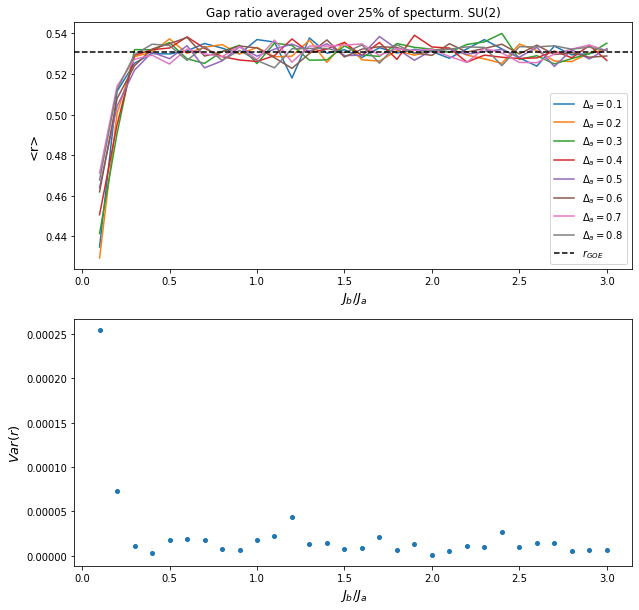

In [81]:
plot_two_params_gap(tmp_su2, col_b_su2, 'Gap ratio averaged over 25% of specturm. SU(2)', '$J_b/J_a$', '$\Delta _a$')

### entropies

In [82]:
S_max_su2 = tmp_su2.pivot_table(index=[col_a_su2], columns=[col_b_su2], values=['S_max']).replace(np.nan, constant_page_correction(N)).astype(float) - constant_page_correction(N)
S_frac_su2 = tmp_su2.pivot_table(index=[col_a_su2], columns=[col_b_su2], values=['S_f=200.000']).replace(np.nan, constant_page_correction(N)).astype(float) - constant_page_correction(N)
S_max_su2

S_max                                                              \
Jb        0.1       0.2       0.3       0.4       0.5       0.6       0.7   
da                                                                          
0.1 -0.197868 -0.155987 -0.090050 -0.072142 -0.055428 -0.048763 -0.042294   
0.2 -0.139932 -0.158275 -0.096336 -0.067291 -0.058942 -0.048648 -0.047498   
0.3 -0.271883 -0.157620 -0.100649 -0.070656 -0.056270 -0.052048 -0.043012   
0.4 -0.323116 -0.125862 -0.097819 -0.072665 -0.062853 -0.053529 -0.045181   
0.5 -0.313513 -0.176639 -0.106978 -0.078753 -0.062283 -0.055833 -0.049003   
0.6 -0.290516 -0.175153 -0.109320 -0.081167 -0.069870 -0.058731 -0.054027   
0.7 -0.288688 -0.173284 -0.122729 -0.084854 -0.069594 -0.062017 -0.058941   
0.8 -0.302669 -0.175188 -0.117481 -0.093348 -0.079355 -0.069672 -0.062157   

                                   ...                                \
Jb        0.8       0.9       1.0  ...       2.1       2.2       2.3   
da                                 ...                                 
0.1 -0.038405 -0.034064 -0.032952  ... -0.028934 -0.027748 -0.030304   
0.2 -0.040120 -0.037599 -0.034179  ... -0.028086 -0.030502 -0.029760   
0.3 -0.042322 -0.040066 -0.035638  ... -0.028701 -0.029208 -0.027049   
0.4 -0.039537 -0.041464 -0.037766  ... -0.030335 -0.027343 -0.029308   
0.5 -0.043313 -0.042783 -0.038496  ... -0.032104 -0.034201 -0.031050   
0.6 -0.047734 -0.044451 -0.041686  ... -0.032652 -0.030942 -0.032487   
0.7 -0.050455 -0.046132 -0.046517  ... -0.032723 -0.032168 -0.035515   
0.8 -0.054284 -0.049176 -0.046196  ... -0.031914 -0.032757 -0.031739   

                                                                           
Jb        2.4       2.5       2.6       2.7       2.8       2.9       3.0  
da                                                                         
0.1 -0.030258 -0.029693 -0.029630 -0.028883 -0.029618 -0.028880 -0.027060  
0.2 -0.029184 -0.030950 -0.031747 -0.032053 -0.032448 -0.028806 -0.028159  
0.3 -0.027986 -0.031162 -0.029771 -0.029291 -0.030477 -0.031764 -0.031284  
0.4 -0.030978 -0.030531 -0.027678 -0.029901 -0.029921 -0.029941 -0.030667  
0.5 -0.033714 -0.032141 -0.029455 -0.030084 -0.029421 -0.030472 -0.031911  
0.6 -0.031588 -0.031731 -0.035126 -0.033278 -0.030005 -0.029669 -0.030087  
0.7 -0.032682 -0.033303 -0.032588 -0.035133 -0.035954 -0.033975 -0.034743  
0.8 -0.036743 -0.030876 -0.033850 -0.034895 -0.033745 -0.031932 -0.033233  

[8 rows x 30 columns]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


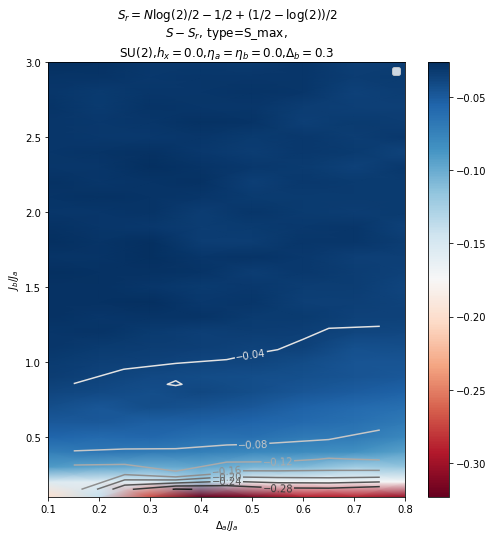

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


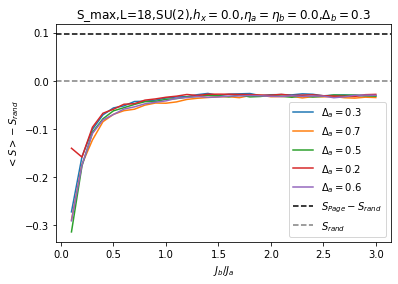

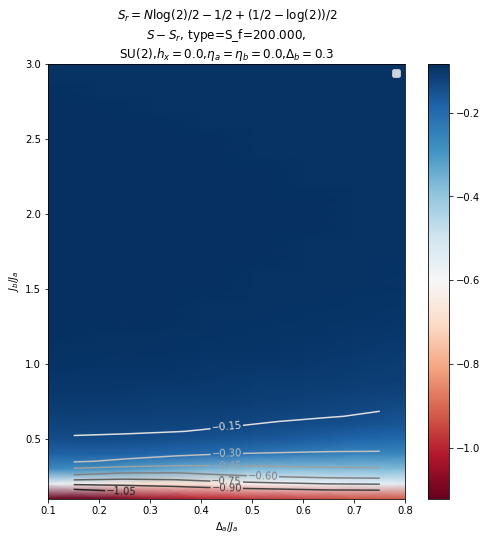

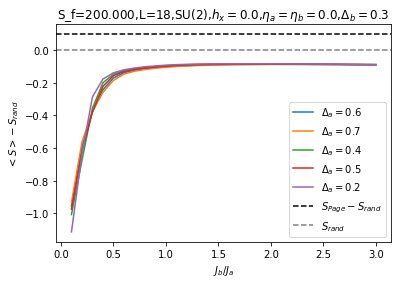

In [83]:
xlabel = '$\Delta _a / J_a$'
ylabel = '$J_b / J_a$'
title = f'SU(2),$h_x=0.0$,$\eta _a = \eta _b = 0.0$,$\Delta _b = 0.3$'
plot_heatmap_values(S_max_su2, 'S_max', xlabel, ylabel, title)
plot_two_params_entro(S_max_su2, 5, 'S_max','$\Delta _a$', title, '$J_b/J_a$', N)
plot_heatmap_values(S_frac_su2, 'S_f=200.000', xlabel, ylabel, title)
plot_two_params_entro(S_frac_su2, 5, 'S_f=200.000','$\Delta _a$', title, '$J_b/J_a$', N)

# SU2 breaking

In [2]:
N = 16
title = '$NSU(2),h_x=0.4$,$\eta _a = eta _b = 0.5$,$\Delta _a = \Delta _b = 0.3$'
directory = current_dir + f"{kPSep}Data{kPSep}Data{kPSep}xyz_nsu2_bc=1{kPSep}resultsXYZ{N}{kPSep}"
fractions = [0.25, 200]

In [3]:
df_nsu2 = get_log_file(directory)
print(df_nsu2.columns)
df_nsu2

                                                 model
0    _xyz_sym,Ns=16,Ja=1.00,Jb=0.10,hx=0.40,hz=0.10...
1    _xyz_sym,Ns=16,Ja=1.00,Jb=0.10,hx=0.40,hz=0.10...
2    _xyz_sym,Ns=16,Ja=1.00,Jb=0.10,hx=0.40,hz=0.20...
3    _xyz_sym,Ns=16,Ja=1.00,Jb=0.10,hx=0.40,hz=0.20...
4    _xyz_sym,Ns=16,Ja=1.00,Jb=0.10,hx=0.40,hz=0.30...
..                                                 ...
211  _xyz_sym,Ns=16,Ja=1.00,Jb=3.50,hx=0.40,hz=0.40...
212  _xyz_sym,Ns=16,Ja=1.00,Jb=3.50,hx=0.40,hz=0.50...
213  _xyz_sym,Ns=16,Ja=1.00,Jb=3.50,hx=0.40,hz=0.50...
214  _xyz_sym,Ns=16,Ja=1.00,Jb=3.50,hx=0.40,hz=0.60...
215  _xyz_sym,Ns=16,Ja=1.00,Jb=3.50,hx=0.40,hz=0.60...

[216 rows x 1 columns]
Index(['model', 'Ns', 'Ja', 'Jb', 'hx', 'hz', 'da', 'db', 'ea', 'eb', 'k', 'p',
       'x', 'bc', 'spectrum_num', 'model_short', 'Nh'],
      dtype='object')


,model,Ns,Ja,Jb,hx,hz,da,db,ea,eb,k,p,x,bc,spectrum_num,model_short,Nh
0,"_xyz_sym,Ns=16,Ja=1.00,Jb=0.10,hx=0.40,hz=0.10...",16.0,1.0,0.1,0.4,0.1,0.3,0.3,0.5,0.5,0.0,-1.0,1.0,1.0,32640.0,"_xyz_sym,Ns=16,Ja=1.00,Jb=0.10,hx=0.40,hz=0.10...",32640
1,"_xyz_sym,Ns=16,Ja=1.00,Jb=0.10,hx=0.40,hz=0.10...",16.0,1.0,0.1,0.4,0.1,0.3,0.3,0.5,0.5,0.0,1.0,1.0,1.0,32896.0,"_xyz_sym,Ns=16,Ja=1.00,Jb=0.10,hx=0.40,hz=0.10...",32896
2,"_xyz_sym,Ns=16,Ja=1.00,Jb=0.10,hx=0.40,hz=0.20...",16.0,1.0,0.1,0.4,0.2,0.3,0.3,0.5,0.5,0.0,-1.0,1.0,1.0,32640.0,"_xyz_sym,Ns=16,Ja=1.00,Jb=0.10,hx=0.40,hz=0.20...",32640
3,"_xyz_sym,Ns=16,Ja=1.00,Jb=0.10,hx=0.40,hz=0.20...",16.0,1.0,0.1,0.4,0.2,0.3,0.3,0.5,0.5,0.0,1.0,1.0,1.0,32896.0,"_xyz_sym,Ns=16,Ja=1.00,Jb=0.10,hx=0.40,hz=0.20...",32896
4,"_xyz_sym,Ns=16,Ja=1.00,Jb=0.10,hx=0.40,hz=0.30...",16.0,1.0,0.1,0.4,0.3,0.3,0.3,0.5,0.5,0.0,-1.0,1.0,1.0,32640.0,"_xyz_sym,Ns=16,Ja=1.00,Jb=0.10,hx=0.40,hz=0.30...",32640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,"_xyz_sym,Ns=16,Ja=1.00,Jb=3.50,hx=0.40,hz=0.40...",16.0,1.0,3.5,0.4,0.4,0.3,0.3,0.5,0.5,0.0,1.0,1.0,1.0,32896.0,"_xyz_sym,Ns=16,Ja=1.00,Jb=3.50,hx=0.40,hz=0.40...",32896
212,"_xyz_sym,Ns=16,Ja=1.00,Jb=3.50,hx=0.40,hz=0.50...",16.0,1.0,3.5,0.4,0.5,0.3,0.3,0.5,0.5,0.0,-1.0,1.0,1.0,32640.0,"_xyz_sym,Ns=16,Ja=1.00,Jb=3.50,hx=0.40,hz=0.50...",32640
213,"_xyz_sym,Ns=16,Ja=1.00,Jb=3.50,hx=0.40,hz=0.50...",16.0,1.0,3.5,0.4,0.5,0.3,0.3,0.5,0.5,0.0,1.0,1.0,1.0,32896.0,"_xyz_sym,Ns=16,Ja=1.00,Jb=3.50,hx=0.40,hz=0.50...",32896
214,"_xyz_sym,Ns=16,Ja=1.00,Jb=3.50,hx=0.40,hz=0.60...",16.0,1.0,3.5,0.4,0.6,0.3,0.3,0.5,0.5,0.0,-1.0,1.0,1.0,32640.0,"_xyz_sym,Ns=16,Ja=1.00,Jb=3.50,hx=0.40,hz=0.60...",32640


In [4]:
# set the gapratios for all models in the DF
set_gap_ratios_df_log(df_nsu2, directory, use_mls=False)
df_nsu2

100%|██████████| 216/216 [00:00<00:00, 836.31it/s]


,model,Ns,Ja,Jb,hx,hz,da,db,ea,eb,k,p,x,bc,spectrum_num,model_short,Nh,gapratios
0,"_xyz_sym,Ns=16,Ja=1.00,Jb=0.10,hx=0.40,hz=0.10...",16.0,1.0,0.1,0.4,0.1,0.3,0.3,0.5,0.5,0.0,-1.0,1.0,1.0,32640.0,"_xyz_sym,Ns=16,Ja=1.00,Jb=0.10,hx=0.40,hz=0.10...",32640,0.537810
1,"_xyz_sym,Ns=16,Ja=1.00,Jb=0.10,hx=0.40,hz=0.10...",16.0,1.0,0.1,0.4,0.1,0.3,0.3,0.5,0.5,0.0,1.0,1.0,1.0,32896.0,"_xyz_sym,Ns=16,Ja=1.00,Jb=0.10,hx=0.40,hz=0.10...",32896,0.528413
2,"_xyz_sym,Ns=16,Ja=1.00,Jb=0.10,hx=0.40,hz=0.20...",16.0,1.0,0.1,0.4,0.2,0.3,0.3,0.5,0.5,0.0,-1.0,1.0,1.0,32640.0,"_xyz_sym,Ns=16,Ja=1.00,Jb=0.10,hx=0.40,hz=0.20...",32640,0.531605
3,"_xyz_sym,Ns=16,Ja=1.00,Jb=0.10,hx=0.40,hz=0.20...",16.0,1.0,0.1,0.4,0.2,0.3,0.3,0.5,0.5,0.0,1.0,1.0,1.0,32896.0,"_xyz_sym,Ns=16,Ja=1.00,Jb=0.10,hx=0.40,hz=0.20...",32896,0.527855
4,"_xyz_sym,Ns=16,Ja=1.00,Jb=0.10,hx=0.40,hz=0.30...",16.0,1.0,0.1,0.4,0.3,0.3,0.3,0.5,0.5,0.0,-1.0,1.0,1.0,32640.0,"_xyz_sym,Ns=16,Ja=1.00,Jb=0.10,hx=0.40,hz=0.30...",32640,0.527060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,"_xyz_sym,Ns=16,Ja=1.00,Jb=3.50,hx=0.40,hz=0.40...",16.0,1.0,3.5,0.4,0.4,0.3,0.3,0.5,0.5,0.0,1.0,1.0,1.0,32896.0,"_xyz_sym,Ns=16,Ja=1.00,Jb=3.50,hx=0.40,hz=0.40...",32896,0.534329
212,"_xyz_sym,Ns=16,Ja=1.00,Jb=3.50,hx=0.40,hz=0.50...",16.0,1.0,3.5,0.4,0.5,0.3,0.3,0.5,0.5,0.0,-1.0,1.0,1.0,32640.0,"_xyz_sym,Ns=16,Ja=1.00,Jb=3.50,hx=0.40,hz=0.50...",32640,0.528781
213,"_xyz_sym,Ns=16,Ja=1.00,Jb=3.50,hx=0.40,hz=0.50...",16.0,1.0,3.5,0.4,0.5,0.3,0.3,0.5,0.5,0.0,1.0,1.0,1.0,32896.0,"_xyz_sym,Ns=16,Ja=1.00,Jb=3.50,hx=0.40,hz=0.50...",32896,0.526374
214,"_xyz_sym,Ns=16,Ja=1.00,Jb=3.50,hx=0.40,hz=0.60...",16.0,1.0,3.5,0.4,0.6,0.3,0.3,0.5,0.5,0.0,-1.0,1.0,1.0,32640.0,"_xyz_sym,Ns=16,Ja=1.00,Jb=3.50,hx=0.40,hz=0.60...",32640,0.531911


In [5]:
# set the entropies for all models in the DF
set_entropies_df_log(df_nsu2, directory, fractions, set_max=True)
df_nsu2

100%|██████████| 216/216 [00:20<00:00, 10.77it/s]


,model,Ns,Ja,Jb,hx,hz,da,db,ea,eb,...,p,x,bc,spectrum_num,model_short,Nh,gapratios,S_f=0.250,S_f=200.000,S_max
0,"_xyz_sym,Ns=16,Ja=1.00,Jb=0.10,hx=0.40,hz=0.10...",16.0,1.0,0.1,0.4,0.1,0.3,0.3,0.5,0.5,...,-1.0,1.0,1.0,32640.0,"_xyz_sym,Ns=16,Ja=1.00,Jb=0.10,hx=0.40,hz=0.10...",32640,0.537810,4.941699,4.955457,4.999921
1,"_xyz_sym,Ns=16,Ja=1.00,Jb=0.10,hx=0.40,hz=0.10...",16.0,1.0,0.1,0.4,0.1,0.3,0.3,0.5,0.5,...,1.0,1.0,1.0,32896.0,"_xyz_sym,Ns=16,Ja=1.00,Jb=0.10,hx=0.40,hz=0.10...",32896,0.528413,4.940792,4.954400,4.999129
2,"_xyz_sym,Ns=16,Ja=1.00,Jb=0.10,hx=0.40,hz=0.20...",16.0,1.0,0.1,0.4,0.2,0.3,0.3,0.5,0.5,...,-1.0,1.0,1.0,32640.0,"_xyz_sym,Ns=16,Ja=1.00,Jb=0.10,hx=0.40,hz=0.20...",32640,0.531605,4.943574,4.956885,5.000085
3,"_xyz_sym,Ns=16,Ja=1.00,Jb=0.10,hx=0.40,hz=0.20...",16.0,1.0,0.1,0.4,0.2,0.3,0.3,0.5,0.5,...,1.0,1.0,1.0,32896.0,"_xyz_sym,Ns=16,Ja=1.00,Jb=0.10,hx=0.40,hz=0.20...",32896,0.527855,4.942712,4.957427,4.997540
4,"_xyz_sym,Ns=16,Ja=1.00,Jb=0.10,hx=0.40,hz=0.30...",16.0,1.0,0.1,0.4,0.3,0.3,0.3,0.5,0.5,...,-1.0,1.0,1.0,32640.0,"_xyz_sym,Ns=16,Ja=1.00,Jb=0.10,hx=0.40,hz=0.30...",32640,0.527060,4.944211,4.957902,4.999297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,"_xyz_sym,Ns=16,Ja=1.00,Jb=3.50,hx=0.40,hz=0.40...",16.0,1.0,3.5,0.4,0.4,0.3,0.3,0.5,0.5,...,1.0,1.0,1.0,32896.0,"_xyz_sym,Ns=16,Ja=1.00,Jb=3.50,hx=0.40,hz=0.40...",32896,0.534329,4.952209,4.965798,4.996164
212,"_xyz_sym,Ns=16,Ja=1.00,Jb=3.50,hx=0.40,hz=0.50...",16.0,1.0,3.5,0.4,0.5,0.3,0.3,0.5,0.5,...,-1.0,1.0,1.0,32640.0,"_xyz_sym,Ns=16,Ja=1.00,Jb=3.50,hx=0.40,hz=0.50...",32640,0.528781,4.954524,4.967487,4.998075
213,"_xyz_sym,Ns=16,Ja=1.00,Jb=3.50,hx=0.40,hz=0.50...",16.0,1.0,3.5,0.4,0.5,0.3,0.3,0.5,0.5,...,1.0,1.0,1.0,32896.0,"_xyz_sym,Ns=16,Ja=1.00,Jb=3.50,hx=0.40,hz=0.50...",32896,0.526374,4.953604,4.967126,5.000386
214,"_xyz_sym,Ns=16,Ja=1.00,Jb=3.50,hx=0.40,hz=0.60...",16.0,1.0,3.5,0.4,0.6,0.3,0.3,0.5,0.5,...,-1.0,1.0,1.0,32640.0,"_xyz_sym,Ns=16,Ja=1.00,Jb=3.50,hx=0.40,hz=0.60...",32640,0.531911,4.955295,4.968316,5.007390


In [6]:
col_a = 'hz'
col_b = 'Jb'
tmp_nsu2 = log_group_two_params(df_nsu2, col_a, col_b, fractions)
tmp_nsu2

,Jb,S_f=0.250,S_f=200.000,S_max,gapratios,Nh
hz,,,,,,
0.1,0.1,4.941244,4.954926,4.999523,0.533093,65536
0.2,0.1,4.943142,4.957157,4.998807,0.529723,65536
0.3,0.1,4.943771,4.957780,4.998121,0.526449,65536
0.4,0.1,4.942781,4.956298,4.996306,0.529009,65536
0.5,0.1,4.940235,4.953753,4.999385,0.532088,65536
...,...,...,...,...,...,...
0.2,3.5,4.950103,4.962362,4.997151,0.529686,65536
0.3,3.5,4.951514,4.964074,4.998086,0.531838,65536
0.4,3.5,4.952695,4.966542,4.997937,0.533431,65536


### gap ratio

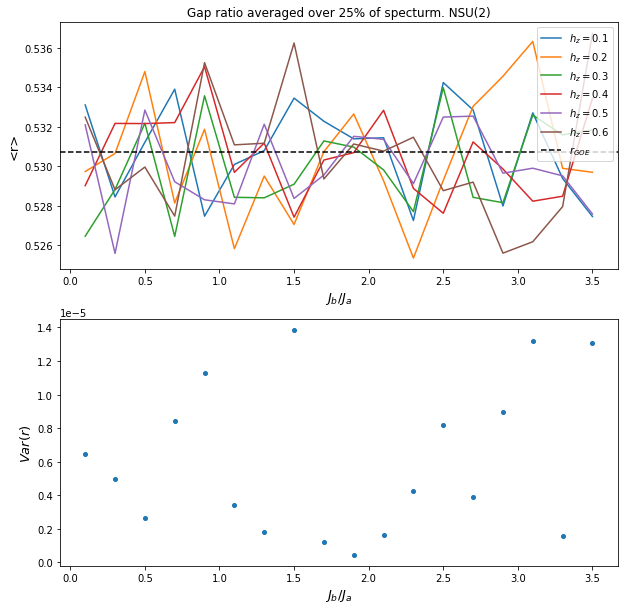

In [7]:
plot_two_params_gap(tmp_nsu2, col_b, 'Gap ratio averaged over 25% of specturm. NSU(2)', '$J_b/J_a$', '$h_z$')

In [8]:
S_max = tmp_nsu2.pivot_table(index=[col_a], columns=[col_b], values=['S_max']).replace(np.nan, 0.0).astype(float) - constant_page_correction(N)
S_100 = tmp_nsu2.pivot_table(index=[col_a], columns=[col_b], values=['S_f=200.000']).replace(np.nan, 0.0).astype(float) - constant_page_correction(N)

S_max

S_max                                                              \
Jb        0.1       0.3       0.5       0.7       0.9       1.1       1.3   
hz                                                                          
0.1  0.050919  0.047078  0.036609  0.032800  0.034298  0.039149  0.042261   
0.2  0.050203  0.047801  0.038944  0.036233  0.040331  0.045181  0.043091   
0.3  0.049518  0.045842  0.034907  0.039408  0.039775  0.039809  0.043338   
0.4  0.047702  0.042340  0.040065  0.035501  0.036207  0.045340  0.045804   
0.5  0.050781  0.043857  0.039561  0.035208  0.040654  0.047108  0.044801   
0.6  0.044258  0.039149  0.037853  0.040109  0.039699  0.044403  0.044201   

                                                                           \
Jb        1.5       1.7       1.9       2.1       2.3       2.5       2.7   
hz                                                                          
0.1  0.044964  0.047615  0.044786  0.048690  0.051792  0.049605  0.053510   
0.2  0.045779  0.044779  0.051633  0.050797  0.049012  0.055813  0.052519   
0.3  0.043038  0.049609  0.046883  0.046094  0.051779  0.049890  0.045618   
0.4  0.051214  0.047220  0.046851  0.048335  0.052496  0.050225  0.049904   
0.5  0.045325  0.048386  0.046591  0.056732  0.052056  0.051548  0.051144   
0.6  0.045828  0.048625  0.050684  0.050943  0.050964  0.054857  0.054917   

                                             
Jb        2.9       3.1       3.3       3.5  
hz                                           
0.1  0.054414  0.049160  0.045861  0.045278  
0.2  0.049278  0.048214  0.050986  0.048547  
0.3  0.052783  0.048834  0.052904  0.049482  
0.4  0.049074  0.049336  0.048754  0.049333  
0.5  0.049446  0.053740  0.051308  0.050631  
0.6  0.056290  0.053024  0.051688  0.053848

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


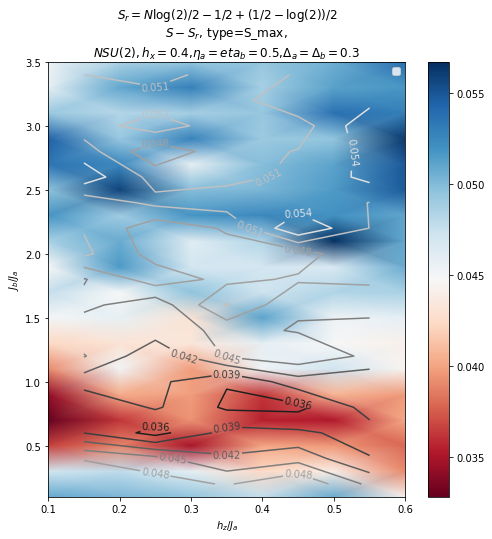

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


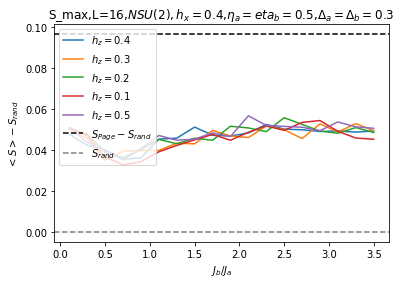

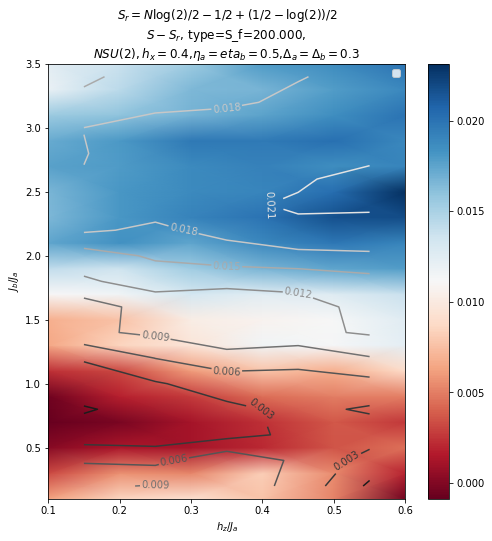

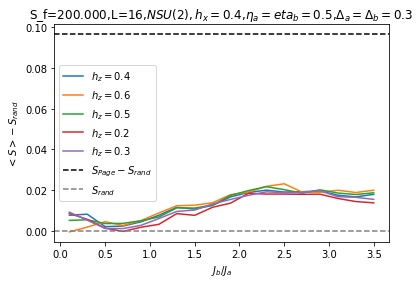

In [9]:
plot_heatmap_values(S_max, 'S_max', '$h_z/J_a$', '$J_b/J_a$', title)
plot_two_params_entro(S_max, 5, 'S_max', '$h_z$', title, '$J_b/J_a$', N)
plot_heatmap_values(S_100, 'S_f=200.000', '$h_z/J_a$', '$J_b/J_a$', title)
plot_two_params_entro(S_100, 5, 'S_f=200.000', '$h_z$', title, '$J_b/J_a$', N)